# 决策树回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#   使用sklearn自带的数据集
data = sklearn.datasets.load_boston()
x = np.array(data.data)
y = np.array(data.target)
print('样本个数：%d, 特征个数：%d' % x.shape)
print('目标值个数', y.shape)
y = y.ravel()

样本个数：506, 特征个数：13
目标值个数 (506,)


In [3]:
# 训练模型
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
model = RandomForestRegressor(n_estimators=50, criterion='mse')
print('开始建模......')
model.fit(x_train, y_train)

开始建模......


RandomForestRegressor(n_estimators=50)

In [4]:
# 预测
order = y_test.argsort(axis=0)
y_test = y_test[order]
x_test = x_test[order, :]
y_pred = model.predict(x_test)
r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('R2:', r2)
print('均方误差：', mse)

R2: 0.8274457942822209
均方误差： 14.3678125


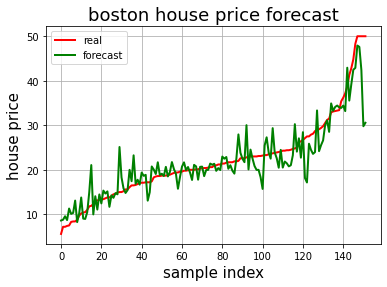

In [5]:
# 画图
t = np.arange(len(y_pred))
# mpl.rcParams['font.sans-serif'] = [u'simHei']
# mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', lw=2, label='real')
plt.plot(t, y_pred, 'g-', lw=2, label='forecast')
plt.legend(loc='best')
plt.title('boston house price forecast', fontsize=18)
plt.xlabel('sample index', fontsize=15)
plt.ylabel('house price', fontsize=15)
plt.grid()
plt.show()